**Telecom Churn Dataset**

Dataset Overview:

Link : https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets

This dataset is designed for understanding and predicting customer retention. It involves detailed analysis of customer data to create targeted programs for retaining customers.

Details : We will utilize the Orange Telecom's Churn Dataset. This dataset contains processed data on customer activities (various features), accompanied by a churn indicator that denotes if a customer has discontinued their subscription. The primary aim is to build models that can predict customer churn.

# Data transforming, Feature creation, and Analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


In [4]:
pip install category_encoders

In [5]:
import category_encoders as ce

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/anumohan22/ML-Data-Cleaning-and-Feature-Selection/main/churn-bigml-80.csv')

# Preliminary Data Analysis

In [7]:
# Viewing data in the file
df.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [8]:
#Checking if any column has a Null values:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [9]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Data Cleaning and Preprocessing

In [10]:
#Rename columns
df = df.rename(columns={'Account length':'Account_Length','Area code' : 'Area_Code',
                   'International plan' : 'International_Plan','Voice mail plan': 'Voice_Mail_Plan',
                   'Number vmail messages' : 'Number_Vmail_Messages',
                   'Total day minutes': 'Total_Day_Mins', 'Total day calls' : 'Total_Day_Calls',
                   'Total day charge' : 'Total_Day_Charge', 'Total eve minutes' : 'Total_Eve_Mins', 'Total eve calls' : 'Total_Eve_Calls',
                   'Total eve charge' : 'Total_Eve_Charge', 'Total night minutes' : 'Total_Night_Mins',
                   'Total night calls' : 'Total_Night_Calls', 'Total night charge' : 'Total_Night_Charge',
                   'Total intl minutes': 'Total_Intl_Mins','Total intl calls' : 'Total_Intl_Calls',
                   'Total intl charge' : 'Total_Intl_Charge', 'Customer service calls' : 'Customer_Service_Calls'})

In [11]:
df = df.drop(['Total_Day_Charge', 'Total_Eve_Charge', 'Total_Night_Charge', 'Total_Intl_Charge'], axis=1)

In [12]:
#Handling Categorical Data
df['International_Plan'] = df['International_Plan'].map({'Yes': 1, 'No': 0})
df['Voice_Mail_Plan'] = df['Voice_Mail_Plan'].map({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].map({False: 0, True: 1})

In [13]:
encoder = ce.BinaryEncoder(cols=['State'])

In [14]:
df_binary = encoder.fit_transform(df['State'])

In [15]:
df = pd.concat([df.drop('State', axis=1), df_binary], axis=1)

In [16]:
df.head(5)

,Account_Length,Area_Code,International_Plan,Voice_Mail_Plan,Number_Vmail_Messages,Total_Day_Mins,Total_Day_Calls,Total_Eve_Mins,Total_Eve_Calls,Total_Night_Mins,...,Total_Intl_Mins,Total_Intl_Calls,Customer_Service_Calls,Churn,State_0,State_1,State_2,State_3,State_4,State_5
0,128,415,0,1,25,265.1,110,197.4,99,244.7,...,10.0,3,1,0,0,0,0,0,0,1
1,107,415,0,1,26,161.6,123,195.5,103,254.4,...,13.7,3,1,0,0,0,0,0,1,0
2,137,415,0,0,0,243.4,114,121.2,110,162.6,...,12.2,5,0,0,0,0,0,0,1,1
3,84,408,1,0,0,299.4,71,61.9,88,196.9,...,6.6,7,2,0,0,0,0,0,1,0
4,75,415,1,0,0,166.7,113,148.3,122,186.9,...,10.1,3,3,0,0,0,0,1,0,0


**1. Fit a linear model and interpret the regression coefficients**

# Logistic Regression

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

In [18]:
# Split the dataset into features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

In [19]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# Initialize and fit the Logistic Regression model
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [22]:
# Predict on the testing set
y_pred = logistic_regression_model.predict(X_test_scaled)

In [23]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.8595505617977528
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       455
           1       0.57      0.22      0.31        79

    accuracy                           0.86       534
   macro avg       0.72      0.59      0.62       534
weighted avg       0.83      0.86      0.83       534




-  **Accuracy (86%)**: The model correctly predicted the churn status for 86% of the customers in the test set.

- **Precision for Class 0 (0.88):** This measures the accuracy of positive predictions for the class labeled '0' (assumed to be the 'non-churn' class).

- **Recall for Class 0 (0.97):** This is the ability of the model to find all the actual 'non-churn' cases. It indicates that the model successfully identified 97% of all 'non-churn' cases in the test set.

- **F1-Score for Class 0 (0.92):** This is the harmonic mean of precision and recall for the 'non-churn' class. A high F1 score (close to 1) indicates a good balance between precision and recall. For 'non-churn', the F1 score is 0.92, suggesting a strong performance for this class.

- **Precision for Class 1 (0.57):** For the 'churn' class (assumed to be labeled '1'), the precision is 57%. This means that when the model predicts a customer will churn, it is correct 57% of the time.

- **Recall for Class 1 (0.22):** The recall for the 'churn' class is significantly lower at 22%, indicating the model's limited ability to identify all actual 'churn' cases.

- **F1-Score for Class 1 (0.31):** The F1 score for the 'churn' class is 0.31, which is relatively low. This score suggests that the model struggles to balance precision and recall for predicting churn.


**Summary:**
- The overall accuracy of the model is high, the detailed metrics reveal that it performs much better at identifying 'non-churn' customers than 'churn' customers.
- The high performance on the 'non-churn' class skews the overall accuracy, masking the model's challenges with accurately predicting the minority 'churn' class.
- The performance of the two classes suggests a need for further model tuning or exploring different models and techniques to better capture the characteristics of the 'churn' class that may handle imbalanced data more effectively.

In [24]:
# To get the coefficients (importance) of each feature
feature_importance = pd.DataFrame(logistic_regression_model.coef_[0], index=X.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)
print(feature_importance)

                        Coefficient
Total_Day_Mins             0.743668
International_Plan         0.678973
Customer_Service_Calls     0.635123
Total_Intl_Mins            0.290445
Number_Vmail_Messages      0.288671
Total_Eve_Mins             0.280630
State_4                    0.189131
Total_Night_Mins           0.147336
State_0                    0.085797
Total_Day_Calls            0.068700
State_5                    0.061703
Account_Length             0.053042
State_2                    0.027182
Total_Eve_Calls            0.013020
State_3                   -0.015865
Total_Night_Calls         -0.029903
Area_Code                 -0.050533
State_1                   -0.109906
Total_Intl_Calls          -0.282658
Voice_Mail_Plan           -0.728857


**2. Fit a tree-based model and interpret the nodes**

# Random Forest Classifier

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [29]:
# Split the dataset into features (X) and target variable (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

In [30]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Initialize the Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

In [32]:
# Fit the model on the training data
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
# Make predictions on the test set
y_pred = random_forest.predict(X_test)

In [34]:
# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9288389513108615
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       455
           1       0.96      0.54      0.69        79

    accuracy                           0.93       534
   macro avg       0.94      0.77      0.83       534
weighted avg       0.93      0.93      0.92       534



In [35]:
# Extract feature importances
feature_importances = pd.DataFrame(random_forest.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

print(feature_importances)

                        importance
Total_Day_Mins            0.212696
Customer_Service_Calls    0.105345
Total_Eve_Mins            0.095391
International_Plan        0.086725
Total_Intl_Mins           0.077537
Total_Night_Mins          0.059975
Total_Intl_Calls          0.057375
Total_Day_Calls           0.051222
Total_Night_Calls         0.050781
Account_Length            0.048402
Total_Eve_Calls           0.044295
Number_Vmail_Messages     0.027092
Voice_Mail_Plan           0.014660
Area_Code                 0.014164
State_4                   0.009870
State_0                   0.009665
State_2                   0.009130
State_5                   0.008713
State_3                   0.008496
State_1                   0.008465


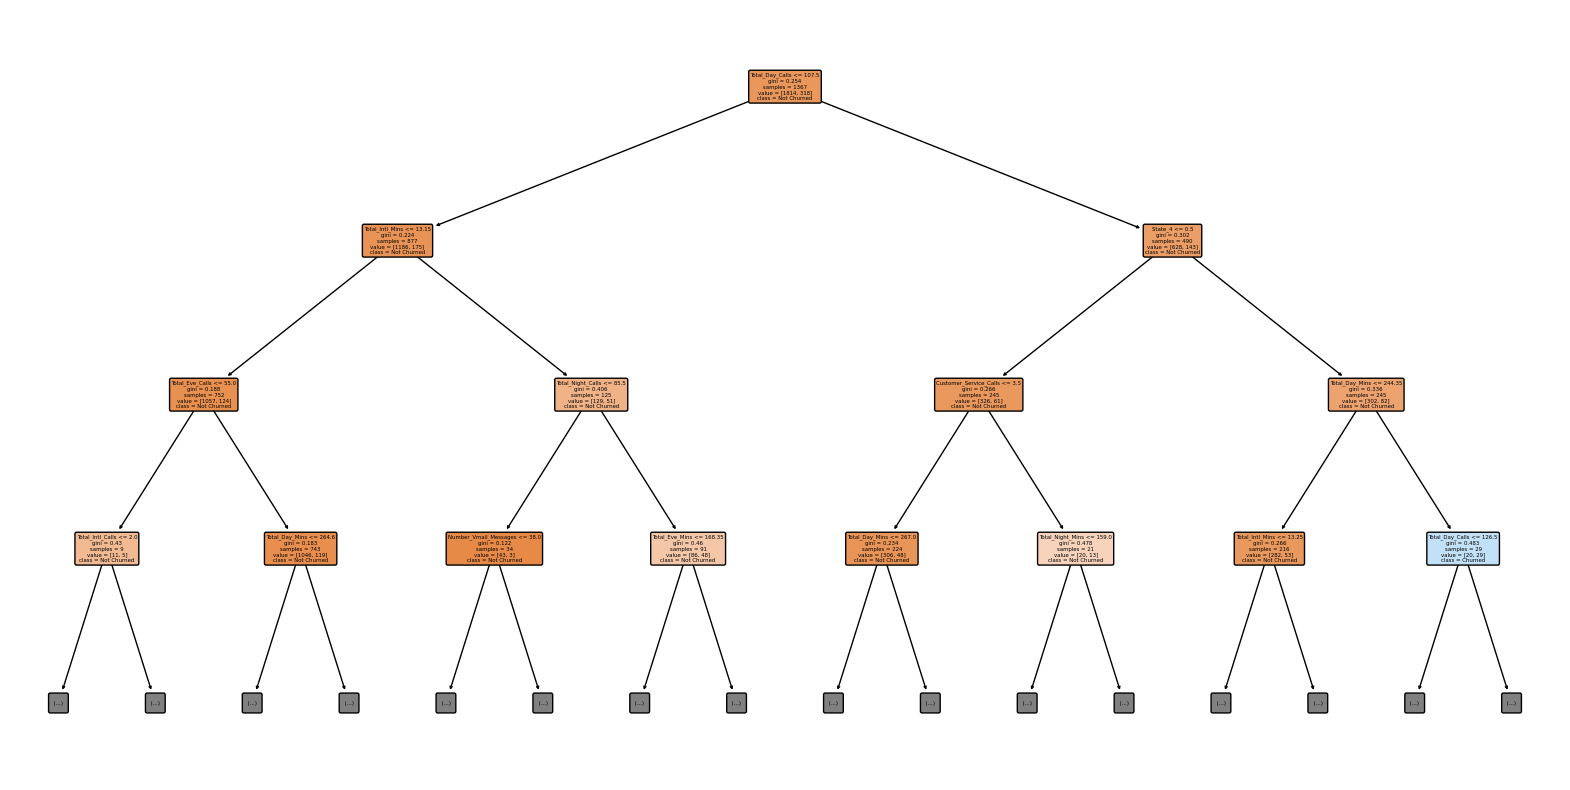

In [36]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Choose one tree from your Random Forest model
single_tree = random_forest.estimators_[0]  # For example, visualize the first tree

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(single_tree,
          feature_names=X_train.columns,
          class_names=['Not Churned', 'Churned'],
          filled=True,
          rounded=True,
          max_depth=3)  # Limit depth for readability; adjust as needed
plt.show()


Root Node: At the top of the tree, this node represents the first and most significant split made in the data based on a certain feature.

Internal Nodes: Each subsequent division creates two new branches and represents another feature that the tree uses to split the data. These are typically represented by orange boxes in the image.

Leaves or Terminal Nodes: These nodes indicate the final output of the decision process, where no further splitting occurs. They are typically represented by grey boxes.

Splits: The decision rule is displayed on each branch (e.g., "Total_Day_Mins <= 264.45"). This rule is used to split the data into two groups.

Gini Index: This value measures the impurity of the node, with 0 being completely pure (all samples belong to a single class). A lower Gini index indicates a better split.

Samples: The number of samples from the dataset that apply to the rule at each node.

Value: The distribution of class labels at that node, often displayed as a list (e.g., [357, 59]). This tells you how many samples from each class fall into each side of the split.

Class: The majority class of the samples at the node.

# AutoML Model - H20 Model

In [38]:
#Installing required packages

!pip3 install h2o

In [39]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp2knuumqd
  JVM stdout: /tmp/tmp2knuumqd/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp2knuumqd/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_unknownUser_1e5sav
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [40]:
h2o_df = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [41]:
h2o_df.head()

Account_Length,Area_Code,International_Plan,Voice_Mail_Plan,Number_Vmail_Messages,Total_Day_Mins,Total_Day_Calls,Total_Eve_Mins,Total_Eve_Calls,Total_Night_Mins,Total_Night_Calls,Total_Intl_Mins,Total_Intl_Calls,Customer_Service_Calls,Churn,State_0,State_1,State_2,State_3,State_4,State_5
128,415,0,1,25,265.1,110,197.4,99,244.7,91,10,3,1,0,0,0,0,0,0,1
107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0,0,0,0,0,1,0
137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,0,0,0,0,1,1
84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0,0,0,0,0,1,0
75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0,0,0,0,1,0,0
118,510,1,0,0,223.4,98,220.6,101,203.9,118,6.3,6,0,0,0,0,0,1,0,1
121,510,0,1,24,218.2,88,348.5,108,212.6,118,7.5,7,3,0,0,0,0,1,1,0
147,415,1,0,0,157,79,103.1,94,211.8,96,7.1,6,0,0,0,0,0,1,1,1
141,415,1,1,37,258.6,84,222,111,326.4,97,11.2,5,0,0,0,0,1,0,0,0
74,415,0,0,0,187.7,127,163.4,148,196,94,9.1,5,0,0,0,0,1,0,0,1


In [42]:
# Identify predictors and response
x = h2o_df.columns
y = "Churn"  # Replace with your actual target variable name if different
x.remove(y)


In [43]:
# Ensure the target variable is treated as a categorical feature for classification
h2o_df[y] = h2o_df[y].asfactor()
# Split the H2OFrame into a train and test set
train, test = h2o_df.split_frame(ratios=[.8], seed=42)

In [44]:
# Run AutoML for a maximum number of 10 base models
aml = H2OAutoML(max_models=10, seed=1, nfolds=5)  # nfolds is for cross-validation
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_2_AutoML_1_20240318_20506


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    56                 56                          31494                  7            7            7             29            56            39.9821

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.009058072719623009
RMSE: 0.09517390776690327
LogLoss: 0.049197646528074825
Mean Per-Class Error: 0.00583105465558376
AUC: 0.9998937827503187
AUCPR: 0.999374329629389
Gini: 0.9997875655006374

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.20877045784368525
       0     1    Error    Rate
-----  ----  ---  -------  ------------
0      1839  3    0.0016   (3.0/1842.0)
1      3     296  0.01     (3.0/299.0)
Total  1842  299  0.0028   (6.0/2141.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.20877      0.989967  178
max f2                       0.159236     0.99      182
max f0point5                 0.254602     0.993915  174
max accuracy                 0.254602     0.997198  174
max precision                0.995925     1         0
max recall                   0.109744     1         196
max specificity              0.995925     1         0
max absolute_mcc             0.20877      0.988338  178
max min_per_class_accuracy   0.159236     0.993311  182
max mean_per_class_accuracy  0.159236     0.994755  182
max tns                      0.995925     1842      0
max fns                      0.995925     298       0
max fps                      0.00266321   1842      399
max tps                      0.109744     299       196
max tnr                      0.995925     1         0
max fnr                      0.995925     0.996656  0
max fpr                      0.00266321   1         399
max tpr                      0.109744     1         196

Gains/Lift Table: Avg response rate: 13.97 %, avg score: 13.91 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0102756                   0.979083           7.16054    7.16054            1                0.985475    1                           0.985475            0.0735786       0.0735786                  616.054   616.054            0.0735786
2        0.0200841                   0.970819           7.16054    7.16054            1                0.975105    1                           0.98041             0.0702341       0.143813                   616.054   616.054            0.143813
3        0.0303596                   0.96573            7.16054    7.16054            1                0.968422    1                           0.976353            0.0735786       0.217391                   616.054   616.054            0.217391
4        0.0401681                   0.959498           7.16054    7.16054            1                0.962618    1                           0.972999            0.0702341       0.287625                   616.054   616.054            0.287625
5        0.0504437                   0.952179           7.16054    7.16054            1                0.955558    1                           0.96

In [45]:
# View the AutoML Leaderboard
lb = aml.leaderboard
print(lb.head(rows=lb.nrows))

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse        mse
GBM_2_AutoML_1_20240318_20506                           0.922215   0.170843  0.853407                0.112007  0.206976  0.0428392
StackedEnsemble_BestOfFamily_1_AutoML_1_20240318_20506  0.920079   0.167369  0.853216                0.114265  0.202439  0.0409816
GBM_3_AutoML_1_20240318_20506                           0.915631   0.169301  0.854393                0.116752  0.202182  0.0408775
GBM_4_AutoML_1_20240318_20506                           0.915074   0.176021  0.850123                0.115123  0.207747  0.0431589
StackedEnsemble_AllModels_1_AutoML_1_20240318_20506     0.914346   0.164662  0.854297                0.103102  0.199468  0.0397875
XGBoost_2_AutoML_1_20240318_20506                       0.902327   0.209931  0.79096                 0.148622  0.23356   0.0545501
XGBoost_3_AutoML_1_20240318_20506                       0.902182   0.191306  0.8299

- **GBM_2_AutoML_2_20240316_141944:**


> The highest AUC (Area Under the ROC Curve) score of 0.922215, suggesting excellent model performance.


> Had a low log loss of 0.170843, indicating good probability calibration.
Exhibited strong performance in precision-recall space with an AUCPR (Area Under the Precision-Recall Curve) of 0.853407.


> Demonstrated a low mean per class error of 0.112007, showing balanced accuracy across classes.


> Reported a Root Mean Squared Error (RMSE) of 0.206976 and Mean Squared Error (MSE) of 0.0428392, reflecting prediction error margins.

- **StackedEnsemble_BestOfFamily_1_AutoML_2_20240316_141944**:


> Had a slightly lower AUC of 0.920079 compared to the best GBM model.
Exhibited a very similar AUCPR to the best model, indicating good performance on the precision-recall front.



- **GBM_3_AutoML_2_20240316_141944 and GBM_4_AutoML_2_20240316_141944:**


> Performed competitively with AUC scores just above 0.915, close to the best model's performance.
Showed competitive AUCPR values, indicating effective handling of the positive class.



- **StackedEnsemble_AllModels_1_AutoML_2_20240316_141944:**


> Scored a comprehensive AUC of 0.914346, indicating high model performance.
Achieved the lowest log loss of 0.164662, suggesting excellent probability calibration.


> Demonstrated the lowest mean per class error, which indicates it had the best balance in classification performance across classes.



- **XGBoost models (2 and 3) and DRF_1_AutoML_2_20240316_141944:**


> AUC scores in the range of 0.896 to 0.902, which are lower than the best GBM model but still indicate good predictive ability.



> The XGBoost models had lower AUCPR scores compared to the best models, which might indicate less precision and recall balance for the positive class.

- **GLM_1_AutoML_2_20240316_141944:**


> Had the lowest AUC of 0.798125, which is significantly lower than the other models, indicating less ability to distinguish between the classes.

In [46]:
# Predict with the top model from the leaderboard on the test set
preds = aml.leader.predict(test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [47]:
# View the performance of the leader model on the test set
perf = aml.leader.model_performance(test)
print(perf)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.05085413230219231
RMSE: 0.22550860804455405
LogLoss: 0.20537371842818639
Mean Per-Class Error: 0.09241315328316668
AUC: 0.9070327801257603
AUCPR: 0.8563750424173188
Gini: 0.8140655602515205

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.266262898172121
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      424  12   0.0275   (12.0/436.0)
1      14   75   0.1573   (14.0/89.0)
Total  438  87   0.0495   (26.0/525.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.266263     0.852273  86
max f2                       0.266263     0.846501  86
max f0point5                 0.66567      0.863787  52
max accuracy                 0.266263     0.950476  86
max precision                0.980919     1         0
max recall                   0.00756

# Performing Model Interpretability using Shap Analysis

**4. Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods.**

In [82]:
pip install shap

**Shap Values for Logistic Regression**

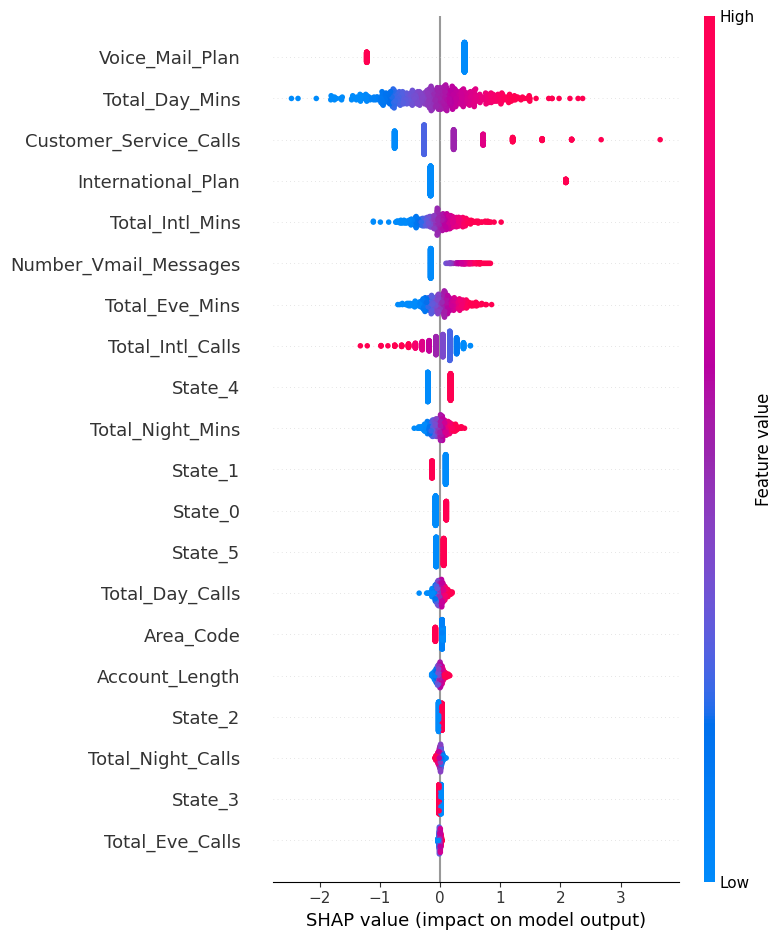

In [33]:
import shap

# Create a SHAP explainer object for the logistic regression model
explainer_lr = shap.Explainer(logistic_regression_model, X_train_scaled)

# Compute SHAP values for the test set
shap_values_lr = explainer_lr(X_test_scaled)

# Visualize the SHAP values for the logistic regression model
shap.summary_plot(shap_values_lr, X_test_scaled, feature_names=X.columns)

**Logistic Regression SHAP Values:**


> High Influence Features: Total_Day_Mins and Customer_Service_Calls appear to have high positive SHAP values, indicating that they have a strong positive impact on the model's prediction of the positive class (likely churn).

> Some Influence: Features like International_Plan and Total_Intl_Calls also seem to influence the prediction significantly, although to a lesser extent than Total_Day_Mins.


> Low or Negative Influence: Some features appear to have low or even negative SHAP values, suggesting a lesser or inverse relationship with the predicted outcome.

> Symmetry: The distribution of SHAP values for some features is symmetric around zero, indicating that they contribute to both the positive and negative predictions.

**Shap Values for Random Forest Classifier Model**

In [25]:
def model_predict(data_asarray):
    # Convert array to DataFrame with appropriate column names
    data_asframe = pd.DataFrame(data_asarray, columns=X_test.columns)
    # Use the model to predict
    return random_forest.predict_proba(data_asframe)[:, 1]  # Assuming binary classification and interest in class 1


PermutationExplainer explainer: 535it [04:32,  1.96it/s]


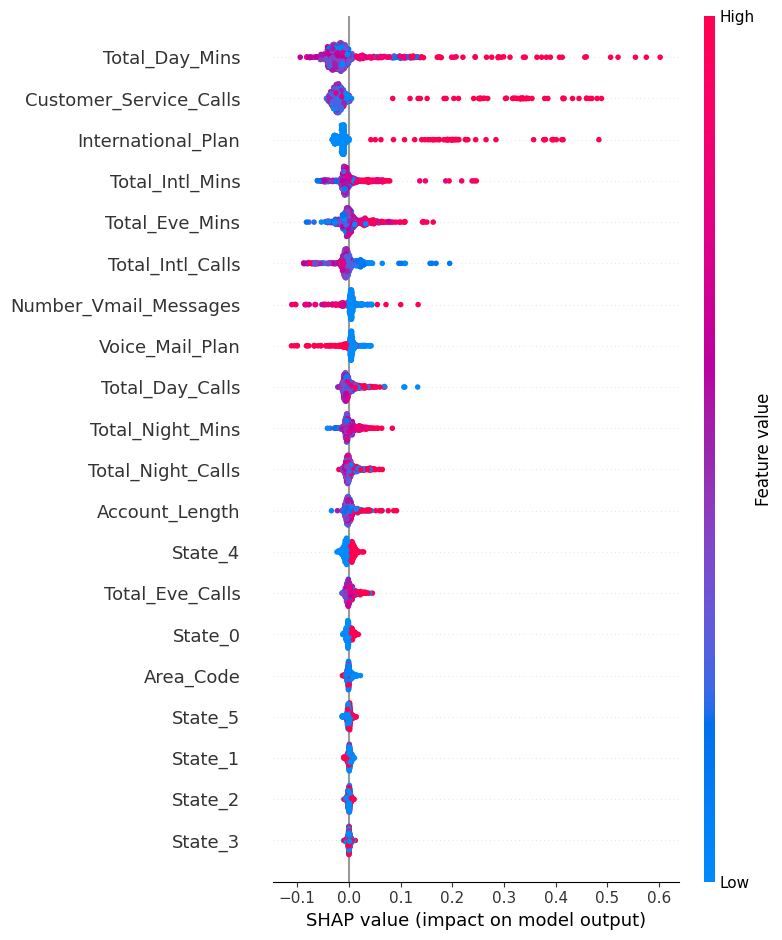

In [28]:
# Initialize SHAP explainer with the model_predict function
import shap
explainer = shap.Explainer(model_predict, shap.sample(X_train, 100))

# Calculate SHAP values using the explainer
shap_values = explainer(X_test)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test)


**Random Forest SHAP Values:**


> High Influence Features: The SHAP values for Total_Day_Mins and Customer_Service_Calls are again prominent, showing a strong influence on the model's predictions.


> Wider Spread: Compared to the Logistic Regression model, the SHAP values for the Random Forest seem to have a wider spread, indicating a more complex relationship between the features and the prediction.

> Distinctive Patterns: There is a clearer distinction between features that contribute to positive and negative predictions, with some features showing a more pronounced effect in one direction.

**Shap Values for AutoML Model**

In [49]:
best_model = aml.leader

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

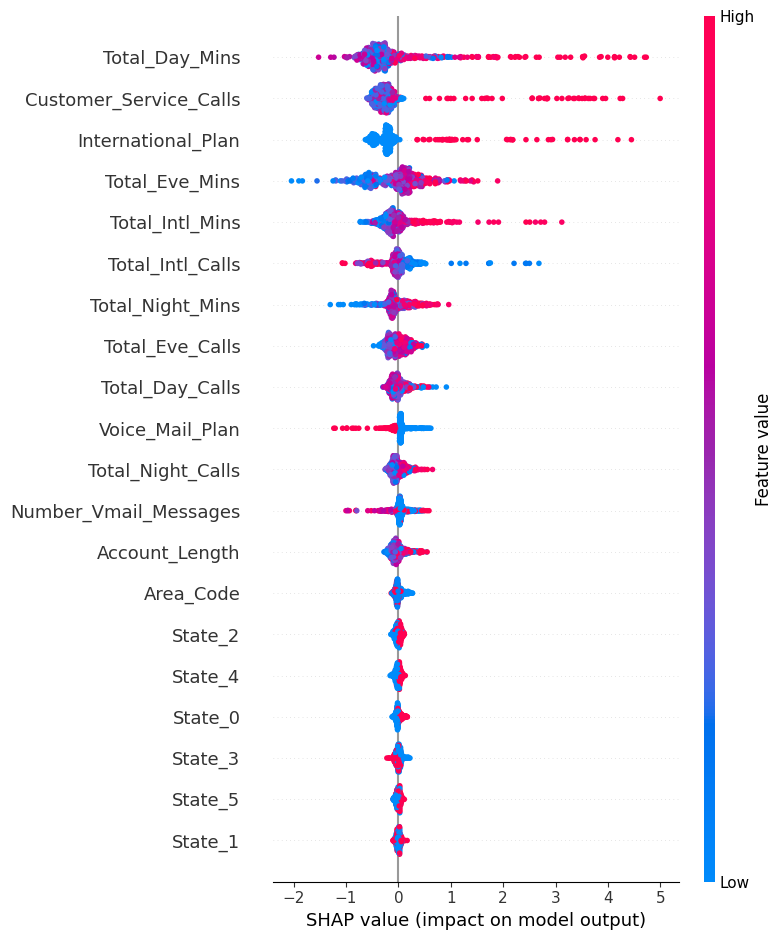

In [40]:
shap_values_h2o = best_model.predict_contributions(test)
shap_values_df = h2o.as_list(shap_values_h2o)
shap_values_matrix = shap_values_df.iloc[:, :-1].values
feature_matrix = h2o.as_list(test.drop(y, axis=1))
shap.summary_plot(shap_values_matrix, features=feature_matrix, feature_names=test.drop(y, axis=1).columns)

**H2O AutoML SHAP Values:**


> Dominant Features: Similar to the other two models, Total_Day_Mins and Customer_Service_Calls dominate the SHAP values, but with even greater magnitude, particularly for Total_Day_Mins.

> Diverse Impact: The plot suggests a variety of feature impact levels, with some features showing very high SHAP values, indicating a strong prediction influence.

> Spread and Impact: The range of SHAP values is broader, which might reflect the complexity and potentially better performance of the ensemble methods typically chosen by H2O AutoML.

Summary:

- Consistent Influencers: Across all three models, Total_Day_Mins and Customer_Service_Calls consistently appear as highly influential features for predicting churn.
- Model Complexity: The Random Forest and H2O AutoML models show a broader spread of SHAP values compared to the Logistic Regression, likely due to their more complex nature and ability to capture non-linear relationships.
- Impact Directionality: SHAP values provide insights into not just the importance of the features but also the direction of their impact (positive or negative), which is not depicted in traditional feature importance plots.

# Feature Importance

**Feature Importance Plots for Logistic Regression**

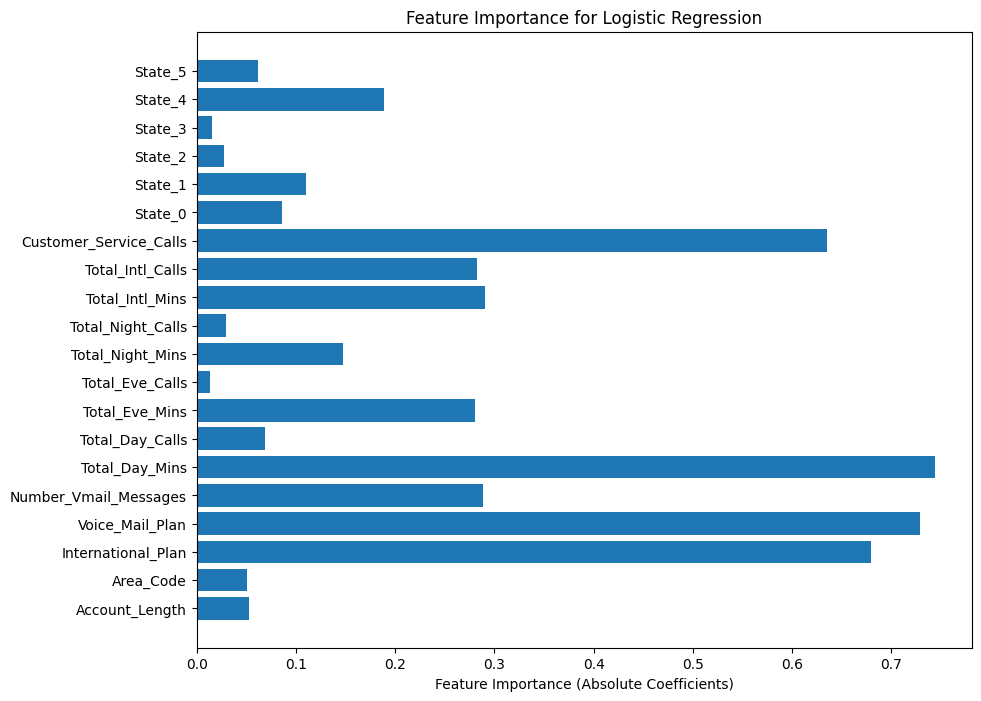

In [84]:
feature_importance_lr = np.abs(logistic_regression_model.coef_[0])
features = X_train.columns

plt.figure(figsize=(10, 8))
plt.barh(range(len(features)), feature_importance_lr, align='center')
plt.yticks(np.arange(len(features)), features)
plt.xlabel('Feature Importance (Absolute Coefficients)')
plt.title('Feature Importance for Logistic Regression')
plt.show()

**Logistic Regression Feature Importance:**
- The plot indicates that Account_Length, Area_Code, and International_Plan have the lowest absolute coefficients, suggesting a smaller influence on model predictions.
- Total_Day_Mins stands out with the highest coefficient by a significant margin, which indicates it's a critical predictor in the Logistic Regression model for the target variable.
- Features related to call minutes (Total_Day_Mins, Total_Eve_Mins, Total_Night_Mins, etc.) appear to be more influential than features related to call counts (like Total_Day_Calls).


**Feature Importance Plots for Random Forest Classifier**

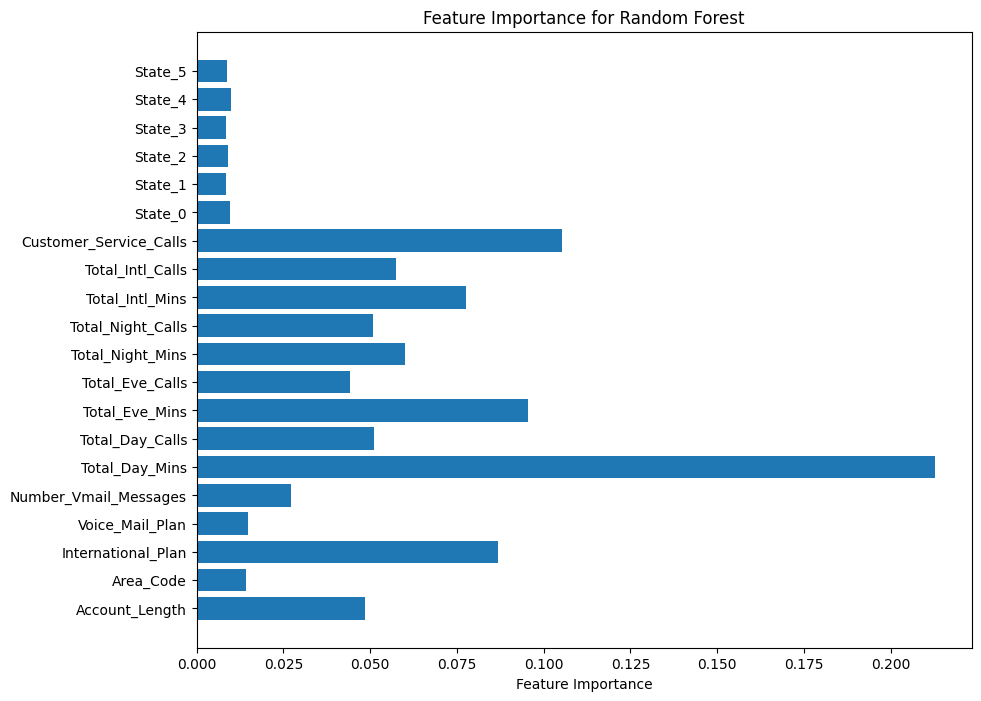

In [85]:
feature_importance_rf = random_forest.feature_importances_

plt.figure(figsize=(10, 8))
plt.barh(range(len(features)), feature_importance_rf, align='center')
plt.yticks(np.arange(len(features)), features)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Random Forest')
plt.show()

**Random Forest Feature Importance:**
- Total_Day_Mins also shows the highest importance in the Random Forest model, consistent with its significance in the Logistic Regression model.
- The feature importance values are more evenly distributed compared to Logistic Regression, which could suggest that the Random Forest model relies on a broader combination of features.
- Customer_Service_Calls appears to be highly important as well, although less so than Total_Day_Mins.

**Feature Importance Plots for AutoMl H2O Model**

In [87]:
best_model = aml.leader

# Extracting feature importance
feature_importance = best_model.varimp(use_pandas=True)


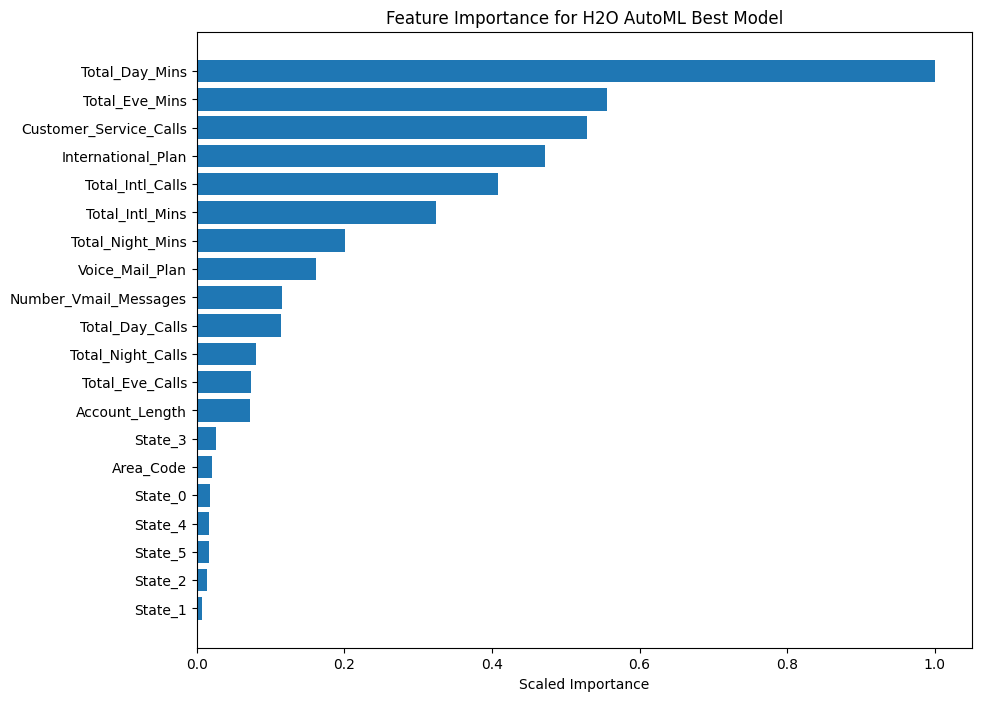

In [88]:
feature_importance_sorted = feature_importance.sort_values(by='scaled_importance', ascending=True)

# Creating the plot
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_sorted['variable'], feature_importance_sorted['scaled_importance'])
plt.xlabel('Scaled Importance')
plt.title('Feature Importance for H2O AutoML Best Model')
plt.show()


**H2O AutoML Best Model Feature Importance:**
- Similar to the other models, Total_Day_Mins has the highest importance, indicating its significance across different modeling approaches.
- There is a substantial drop-off in importance after the top few features, suggesting that the H2O AutoML best model may be relying heavily on a few key features.
- The scaled importance scores provide a normalized view, with the most important feature set to a score of 1, and all other scores are relative to this.

**Summary:**
- Across all three models, Total_Day_Mins consistently emerges as the most important feature, underscoring its strong predictive power.
The relative importance of other features varies between models, which reflects the different ways each modeling approach processes features and captures relationships in the data.
- The Logistic Regression model shows a more significant drop in coefficient magnitude after the most important feature, indicating potential reliance on a single predictor.
- In contrast, Random Forest and H2O AutoML display a smoother gradient, suggesting a more balanced use of the various features.
- The state features (State_0, State_1, etc.) appear at different ranks in all models, suggesting they might not have a consistent predictive influence and their importance might be model-dependent.


 The feature importance plots provide a global perspective on which features are deemed significant by each model and confirm that **Total_Day_Mins** is a **key predictor** for churn across all models.




# Partial Dependence Plots

In [53]:
!pip install scikit-learn==1.1.1

In [1]:
from sklearn.inspection import plot_partial_dependence
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


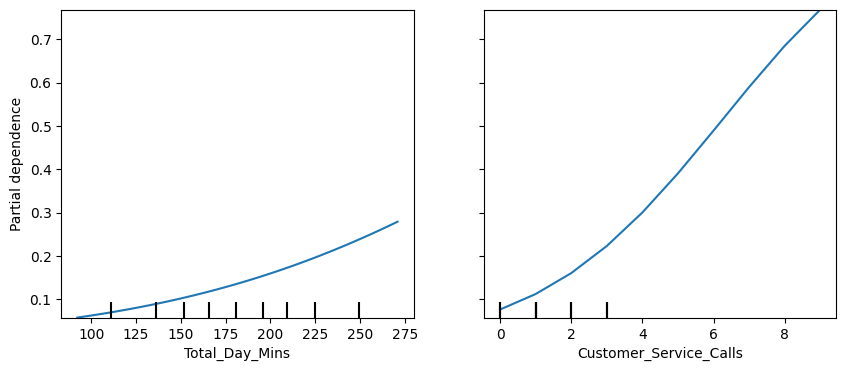

In [26]:
# When fitting the model, make sure to use a DataFrame with feature names
logistic_regression_model.fit(X_train, y_train)

# When calling plot_partial_dependence, also make sure X_train has feature names
fig, ax = plt.subplots(figsize=(10, 4))
plot_partial_dependence(logistic_regression_model, X_train, features=['Total_Day_Mins', 'Customer_Service_Calls'], ax=ax)
plt.show()


**Logistic Regression PDPs:**
- Total_Day_Mins: The relationship shown by Logistic Regression is usually more linear or logistic in nature, reflecting the linear assumptions of the model. The plot might show a steady increase in the target probability as daily minutes increase, without the sharp changes that might be evident in the Random Forest PDP.
- Customer_Service_Calls: Similarly, the effect of customer service calls is likely to increase the probability of the target event more smoothly, without the distinct thresholds observed in tree-based models like Random Forest.

**PDPs for Random Forest Classifier:**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


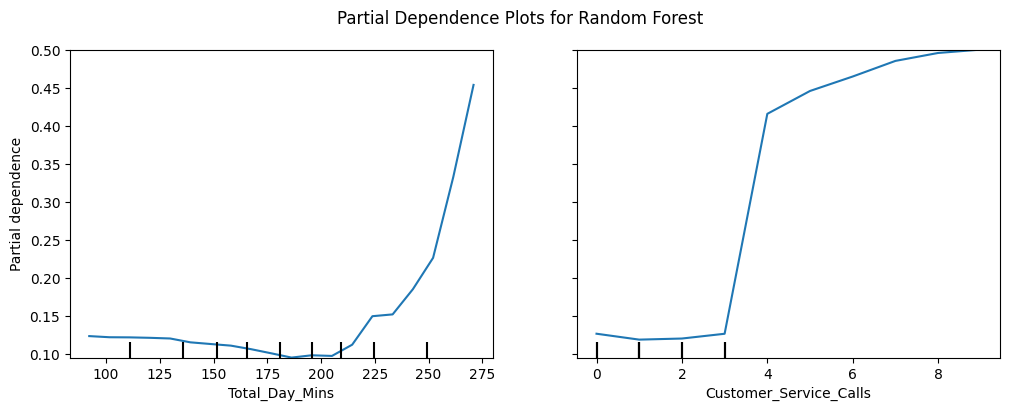

In [37]:
fig, ax = plt.subplots(figsize=(12, 4))
plot_partial_dependence(random_forest, X_train, features=features, ax=ax, grid_resolution=20)
plt.suptitle("Partial Dependence Plots for Random Forest")
plt.show()


**Random Forest PDPs:**
- Total_Day_Mins: The PDP likely shows a non-linear relationship, with the prediction increasing sharply after a certain threshold of minutes. This suggests that the Random Forest model has captured complex interactions that increase the likelihood of the target event (e.g., churn) as daily usage increases past a certain point.
- Customer_Service_Calls: There may be a stepwise increase in the likelihood of the target event as the number of customer service calls increases. It often indicates that after a certain number of calls, the prediction for churn sharply increases, reflecting a threshold effect captured by the Random Forest model.

**PDPs for AutoML H2O Model:**

In [48]:
features_for_pdp = ['Total_Day_Mins', 'Customer_Service_Calls']

PartialDependencePlot progress: |

<ipython-input-52-1d3c38335bf5>:2: H2ODeprecationWarning: ``data`` param of ``ModelBase.partial_plot`` is deprecated, please use ``frame`` instead.
  pdp = best_model.partial_plot(data=train, cols=[feature], plot=True, nbins=20)


████████████████████████████████████████████████| (done) 100%
PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%


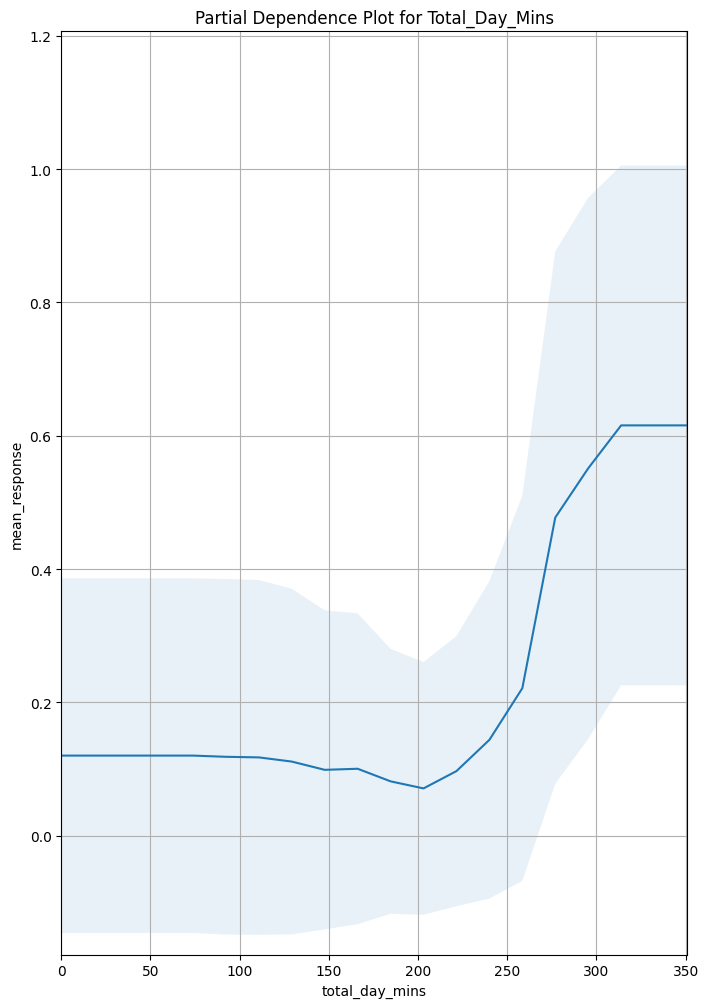

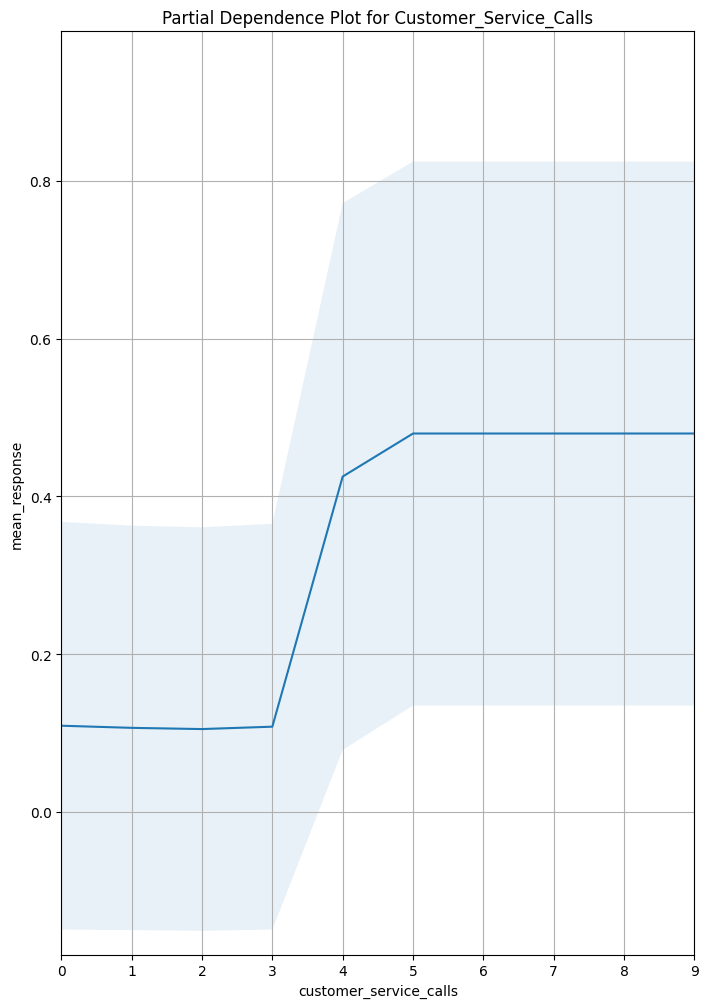

In [52]:
for feature in features_for_pdp:
    pdp = best_model.partial_plot(data=train, cols=[feature], plot=True, nbins=20)


**H2O AutoML PDPs:**
- Total_Day_Mins and Customer_Service_Calls: Since H2O AutoML often selects a complex ensemble model, the PDPs could show a blend of linear and non-linear effects. The AutoML model may reveal more nuanced interactions and thresholds similar to the Random Forest but potentially even more complex due to the ensemble nature of the model.

Summary:

- Random Forest vs. Logistic Regression: The Random Forest model is likely to capture more complex and potentially non-linear interactions between the features and the target variable compared to the Logistic Regression model.

- Random Forest vs. H2O AutoML: The Random Forest PDPs may show more pronounced effects and thresholds due to its tree-based nature, while the H2O AutoML's PDPs may reflect an even more intricate relationship due to the combination of various models and algorithms.
- Logistic Regression vs. H2O AutoML: Logistic Regression PDPs generally reflect a more straightforward, linear relationship, whereas H2O AutoML's PDPs can capture a richer set of patterns depending on the specific algorithms included in the ensemble.

**PDP**s are useful for visualizing and understanding the general effect of one or two features on the predicted outcome across the whole dataset. They provide a high-level view of the model's behavior but lack the granularity and specificity of SHAP values.

**SHAP Values** offer detailed, granular insights at both global and local levels, showing the contribution and direction of each feature's effect on individual predictions.

**Feature Importance Plots** provide a high-level overview of which features are most influential on the model's predictions overall but do not show how different feature values impact the prediction.

**References:**
- https://www.datacamp.com/tutorial/introduction-to-shap-values-machine-learning-interpretability
- https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb
- https://github.com/shap/shap/issues/1252#issuecomment-857469497
- https://github.com/shap/shap/issues/14
- https://medium.com/data-science-in-your-pocket/understanding-partial-dependence-plots-pdps-415346b7e7f1
- https://datascience.stackexchange.com/questions/52476/how-to-use-shap-kernal-explainer-with-pipeline-models
- https://www.kaggle.com/code/vikumsw/explaining-random-forest-model-with-shapely-values
- https://openai.com/gpt-4

MIT License

Copyright (c) 2024 Anusree Mohanan

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.